<a href="https://colab.research.google.com/github/vimanshu/ML/blob/main/LinearRegWithRealData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Linear Regression with a real dataset


In [2]:
# importing required modules
import pandas as pd
import numpy as np
import tensorflow as tf

In [4]:
from matplotlib import pyplot as plt

In [11]:
# the dataset being used here is california housing census data
train_df= pd.read_csv("/content/sample_data/california_housing_train.csv")

In [12]:
print(train_df.head())
print(train_df["median_house_value"])

   longitude  latitude  ...  median_income  median_house_value
0    -114.31     34.19  ...         1.4936             66900.0
1    -114.47     34.40  ...         1.8200             80100.0
2    -114.56     33.69  ...         1.6509             85700.0
3    -114.57     33.64  ...         3.1917             73400.0
4    -114.57     33.57  ...         1.9250             65500.0

[5 rows x 9 columns]
0         66900.0
1         80100.0
2         85700.0
3         73400.0
4         65500.0
           ...   
16995    111400.0
16996     79000.0
16997    103600.0
16998     85800.0
16999     94600.0
Name: median_house_value, Length: 17000, dtype: float64


In [13]:
#scaling the label
train_df["median_house_value"]/=1000
print(train_df.head())

   longitude  latitude  ...  median_income  median_house_value
0    -114.31     34.19  ...         1.4936                66.9
1    -114.47     34.40  ...         1.8200                80.1
2    -114.56     33.69  ...         1.6509                85.7
3    -114.57     33.64  ...         3.1917                73.4
4    -114.57     33.57  ...         1.9250                65.5

[5 rows x 9 columns]


In [14]:
# most ML projects is all about getting to know your data
train_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207.300912
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115.983764
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14.999000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119.400000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180.400000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500.001000


In [15]:
# look out for the strange values in the data
# and try to define whether that feature can be used or not


In [18]:
# define function that build the model
def build_model(my_learning_rate):
  model =tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(units=1,input_shape=(1,)))
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])
  return model

In [28]:
# define function that trains the model

def train_model(model,df,feature,label,epochs,batch_size):
  history= model.fit(x=df[feature],
                     y=df[label],
                     batch_size=batch_size,
                     epochs=epochs)
  
  #to gether train's model weight and bias
  trained_weight= model.get_weights()[0]
  trained_bias= model.get_weights()[1]
  epochs= history.epoch

  hist= pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]
  return trained_weight, trained_bias,epochs,rmse

In [29]:
#defining the plotting function
# make a scatter plot for feature v/s label
# make a loss curve

In [35]:
def plot_the_model(trained_weight, trained_bias,feature,label):
  plt.xlabel(feature)
  plt.ylabel(label)

  random_examples= train_df.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])
  #creating a red line representing the model
  x0=0
  y0= trained_bias
  x1= 10000
  y1= trained_bias+(trained_weight*x1)
  plt.plot([x0,x1],[y0,y1], c='r')

  plt.show()


In [37]:
def plot_the_loss_curve(epochs,rmse):
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs,rmse,label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

Epoch 1/30
567/567 [==============================] - 1s 823us/step - loss: 29535.4794 - root_mean_squared_error: 171.7463
Epoch 2/30
567/567 [==============================] - 0s 870us/step - loss: 27770.3331 - root_mean_squared_error: 166.6340
Epoch 3/30
567/567 [==============================] - 1s 906us/step - loss: 26585.5602 - root_mean_squared_error: 163.0197
Epoch 4/30
567/567 [==============================] - 1s 918us/step - loss: 26356.1435 - root_mean_squared_error: 162.3103
Epoch 5/30
567/567 [==============================] - 1s 918us/step - loss: 25880.8224 - root_mean_squared_error: 160.8403
Epoch 6/30
567/567 [==============================] - 1s 960us/step - loss: 25574.0728 - root_mean_squared_error: 159.8916
Epoch 7/30
567/567 [==============================] - 1s 910us/step - loss: 24800.7244 - root_mean_squared_error: 157.4442
Epoch 8/30
567/567 [==============================] - 1s 916us/step - loss: 22974.3649 - root_mean_squared_error: 151.5566
Epoch 9/30
567/5

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


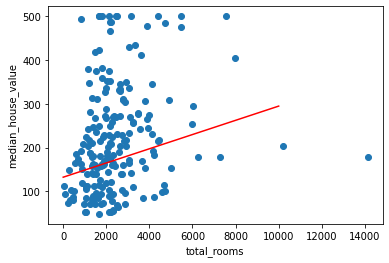

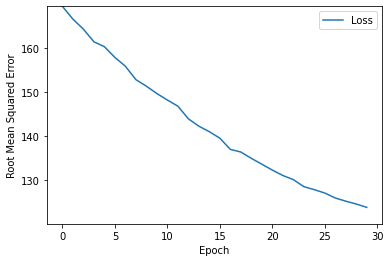

In [38]:
# important part of ml is to determine which feature relates with the
# label
learning_rate= 0.01
epochs=30
batch_size =30

my_feature ="total_rooms"
my_label="median_house_value"

#discarding any pre-existing version of the model
my_model= None
# invoke the func
my_model= build_model(learning_rate)
weight,bias,epochs,rmse= train_model(my_model,train_df,my_feature,
                                      my_label,epochs,batch_size)
print("\n the learning rate of model is: %.4f" %weight)
print("\n the bias of the model is: %.4f" %bias)
plot_the_model(weight,bias, my_feature, my_label)
plot_the_loss_curve(epochs,rmse)

In [44]:
def predict_house_values(n,feature,label):
  batch= train_df[feature][10000:10000+n]
  predicted_values= my_model.predict_on_batch(x=batch)

  print("feature   label    predicted")
  print("value     value    value")
  print("          k$       k$")
  print("-------------------------")
  x=10000
  for i in range(n):
    print("%5.0f %6.0f %15.0f" %(train_df[feature][x+i],
                                  train_df[label][x+i],
                                  predicted_values[i][0]))

In [45]:
predict_house_values(10,my_feature,my_label)

feature   label    predicted
value     value    value
          k$       k$
-------------------------
 1960     53             164
 3400     92             188
 3677     69             192
 2202     62             168
 2403     80             171
 5652    295             224
 3318    500             186
 2552    342             174
 1364    118             155
 3468    128             189


Epoch 1/300
567/567 [==============================] - 1s 838us/step - loss: 44423.3375 - root_mean_squared_error: 210.4509
Epoch 2/300
567/567 [==============================] - 0s 854us/step - loss: 18311.1292 - root_mean_squared_error: 135.0811
Epoch 3/300
567/567 [==============================] - 0s 876us/step - loss: 7677.5609 - root_mean_squared_error: 87.5973
Epoch 4/300
567/567 [==============================] - 1s 958us/step - loss: 7100.8657 - root_mean_squared_error: 84.2538
Epoch 5/300
567/567 [==============================] - 1s 1ms/step - loss: 7195.4978 - root_mean_squared_error: 84.8167
Epoch 6/300
567/567 [==============================] - 1s 927us/step - loss: 6713.9086 - root_mean_squared_error: 81.8963
Epoch 7/300
567/567 [==============================] - 0s 877us/step - loss: 6909.8564 - root_mean_squared_error: 83.1166
Epoch 8/300
567/567 [==============================] - 1s 927us/step - loss: 6891.1204 - root_mean_squared_error: 83.0067
Epoch 9/300
567/567 [=

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


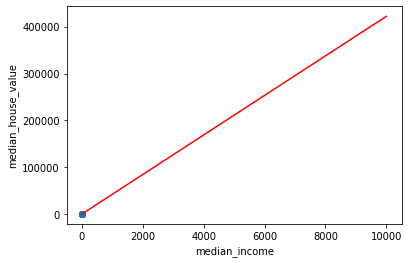

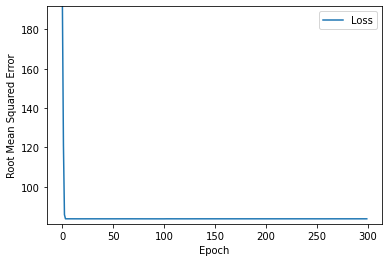

In [51]:
# this model doesn't accurately predict the house prices
# so we'll try putting different feature this time
# The following variables are the hyperparameters.
learning_rate = 0.03
epochs = 300
batch_size = 30

# Specify the feature and the label.
my_feature = "median_income"  # the total number of rooms on a specific city block.
my_label="median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on total_rooms.  

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, train_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [52]:
 predict_house_values(10,my_feature,my_label)

feature   label    predicted
value     value    value
          k$       k$
-------------------------
    2     53             134
    4     92             212
    3     69             154
    2     62             132
    3     80             153
    2    295             147
   10    500             456
    5    342             260
    2    118             147
    4    128             221


Epoch 1/100
567/567 [==============================] - 1s 1ms/step - loss: 50151.7358 - root_mean_squared_error: 223.8244
Epoch 2/100
567/567 [==============================] - 1s 1ms/step - loss: 33823.2920 - root_mean_squared_error: 183.8187
Epoch 3/100
567/567 [==============================] - 1s 906us/step - loss: 22615.0410 - root_mean_squared_error: 150.3319
Epoch 4/100
567/567 [==============================] - 1s 1ms/step - loss: 16979.6152 - root_mean_squared_error: 130.2958
Epoch 5/100
567/567 [==============================] - 1s 931us/step - loss: 16568.3082 - root_mean_squared_error: 128.5481
Epoch 6/100
567/567 [==============================] - 1s 883us/step - loss: 14123.4067 - root_mean_squared_error: 118.7918
Epoch 7/100
567/567 [==============================] - 1s 1ms/step - loss: 14220.3593 - root_mean_squared_error: 119.1955
Epoch 8/100
567/567 [==============================] - 1s 904us/step - loss: 14192.1478 - root_mean_squared_error: 119.0593
Epoch 9/100
567/

Epoch 1/300
567/567 [==============================] - 1s 917us/step - loss: 51748.9401 - root_mean_squared_error: 227.3397
Epoch 2/300
567/567 [==============================] - 0s 869us/step - loss: 34233.0822 - root_mean_squared_error: 184.9394
Epoch 3/300
567/567 [==============================] - 0s 864us/step - loss: 22980.0451 - root_mean_squared_error: 151.5482
Epoch 4/300
567/567 [==============================] - 1s 916us/step - loss: 17944.0947 - root_mean_squared_error: 133.9055
Epoch 5/300
567/567 [==============================] - 1s 1ms/step - loss: 14422.6394 - root_mean_squared_error: 120.0322
Epoch 6/300
567/567 [==============================] - 1s 936us/step - loss: 15641.1098 - root_mean_squared_error: 124.9382
Epoch 7/300
567/567 [==============================] - 1s 907us/step - loss: 14054.9047 - root_mean_squared_error: 118.4883
Epoch 8/300
567/567 [==============================] - 1s 940us/step - loss: 13676.3525 - root_mean_squared_error: 116.9103
Epoch 9/30

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


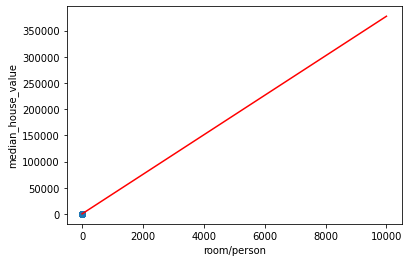

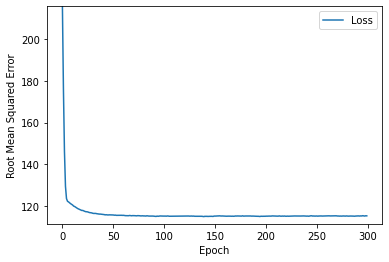

In [56]:
#making a synthetic feature
learning_rate = 0.03
epochs = 300
batch_size = 30

# Specify the synth feature and the label.
train_df["room/person"]= train_df["total_rooms"]/train_df["population"]
my_feature = "room/person"  # the total number of rooms on a specific city block.
my_label="median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on total_rooms.  

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, train_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [57]:
 predict_house_values(10,my_feature,my_label)

feature   label    predicted
value     value    value
          k$       k$
-------------------------
    2     53             189
    2     92             201
    2     69             195
    2     62             211
    1     80             187
    2    295             224
    2    500             210
    2    342             222
    4    118             284
    2    128             213


In [58]:
# generate corr matrix
# this describes how much predictive power a feature has
train_df.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_person,room/person
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982,-0.077773,-0.077773
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917,0.143017,0.143017
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758,-0.103655,-0.103655
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991,0.121001,0.121001
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783,0.047811,0.047811
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850,-0.140277,-0.140277
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031,-0.034049,-0.034049
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871,0.232667,0.232667
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000,0.206969,0.206969
rooms_per_person,-0.077773,0.143017,-0.103655,0.121001,0.047811,-0.140277,-0.034049,0.232667,0.206969,1.000000,1.000000


In [59]:
del train_df["rooms_per_person"]

In [60]:
train_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,room/person
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982,-0.077773
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917,0.143017
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758,-0.103655
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991,0.121001
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783,0.047811
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850,-0.140277
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031,-0.034049
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871,0.232667
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000,0.206969
room/person,-0.077773,0.143017,-0.103655,0.121001,0.047811,-0.140277,-0.034049,0.232667,0.206969,1.000000


Epoch 1/500
170/170 [==============================] - 0s 951us/step - loss: 57240.3418 - root_mean_squared_error: 239.2165
Epoch 2/500
170/170 [==============================] - 0s 859us/step - loss: 49500.0400 - root_mean_squared_error: 222.4693
Epoch 3/500
170/170 [==============================] - 0s 955us/step - loss: 42971.3453 - root_mean_squared_error: 207.2595
Epoch 4/500
170/170 [==============================] - 0s 876us/step - loss: 35907.4138 - root_mean_squared_error: 189.4685
Epoch 5/500
170/170 [==============================] - 0s 889us/step - loss: 30091.4073 - root_mean_squared_error: 173.4631
Epoch 6/500
170/170 [==============================] - 0s 856us/step - loss: 25166.5971 - root_mean_squared_error: 158.6267
Epoch 7/500
170/170 [==============================] - 0s 962us/step - loss: 21141.0875 - root_mean_squared_error: 145.3359
Epoch 8/500
170/170 [==============================] - 0s 833us/step - loss: 17083.2608 - root_mean_squared_error: 130.6804
Epoch 9/

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


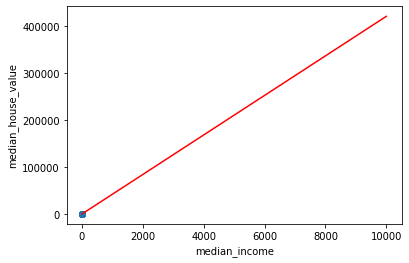

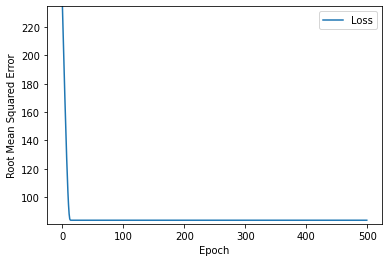

In [61]:
# using the correlation matrix determine the most suitable
# feature for the model
# median_income positively corr with the label-"median_house_value"

# this model doesn't accurately predict the house prices
# so we'll try putting different feature this time
# The following variables are the hyperparameters.
learning_rate = 0.02
epochs = 500
batch_size = 100

# Specify the feature and the label.
my_feature = "median_income"  # the total number of rooms on a specific city block.
my_label="median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on total_rooms.  

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, train_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [62]:
 predict_house_values(10,my_feature,my_label)

feature   label    predicted
value     value    value
          k$       k$
-------------------------
    2     53             134
    4     92             212
    3     69             154
    2     62             132
    3     80             154
    2    295             148
   10    500             456
    5    342             260
    2    118             147
    4    128             221
